## Maxpooling
Here you are going to practice using max-pooling in both OOP and functional way, and see for yourself that the produced results are the same.
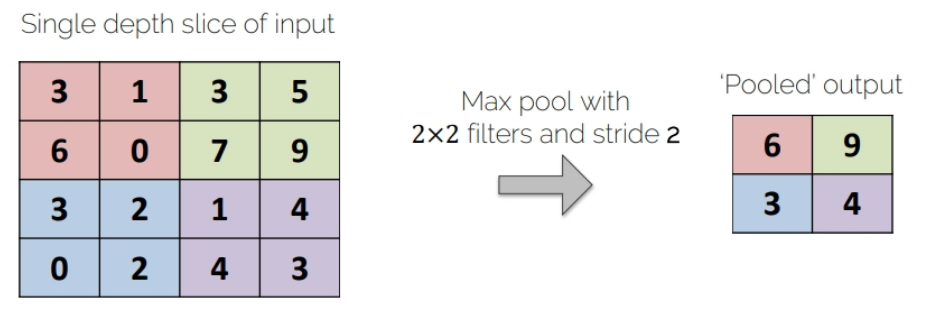

``CLASS torch.nn.MaxPool2d(kernel_size, stride=None, padding=0, dilation=1, return_indices=False, ceil_mode=False)``
*  **kernel_size** – the size of the window to take a max over
*  **stride (Union[int, tuple[int, int]])** – the stride of the window. Default value is kernel_size
*  **padding (Union[int, tuple[int, int]])** – Implicit negative infinity padding to be added on both sides

In [ ]:
import torch
import torch.nn as nn

# Example input (1 channel, 4x4 image)
x = torch.tensor([[
    [[1.0, 2.0, 3.0, 4.0],
     [5.0, 6.0, 7.0, 8.0],
     [9.0, 10.0, 11.0, 12.0],
     [13.0, 14.0, 15.0, 16.0]]
]])

print("Input:\n", x)

# MaxPooling with 2x2 window
maxpool = nn.MaxPool2d(kernel_size=2, stride=2)
out_max = maxpool(x)
print("\nAfter MaxPool:\n", out_max)



Input:
 tensor([[[[ 1.,  2.,  3.,  4.],
          [ 5.,  6.,  7.,  8.],
          [ 9., 10., 11., 12.],
          [13., 14., 15., 16.]]]])

After MaxPool:
 tensor([[[[ 6.,  8.],
          [14., 16.]]]])


🌊 **Explanation**: This code demonstrates pooling. Pooling layers reduce the size of feature maps, providing **translation invariance** and lowering computational cost. Common types are Max Pooling and Average Pooling.


## Average-pooling operator
After coding the max-pooling operator, you are now going to code the average-pooling operator. You just need to replace max-pooling with average pooling.

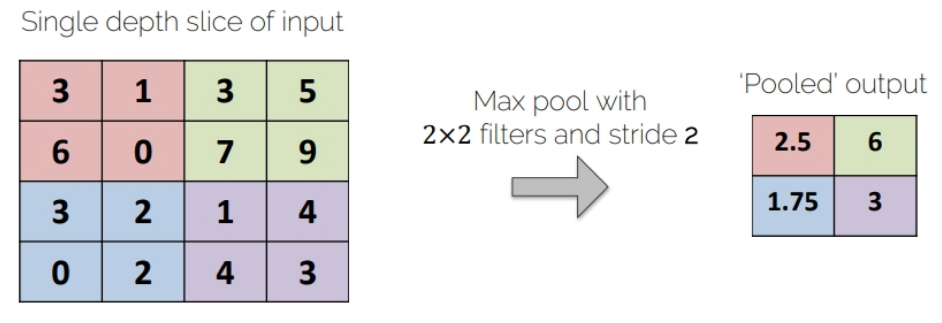

``torch.nn.AvgPool2d(kernel_size, stride=None, padding=0, ceil_mode=False, count_include_pad=True, divisor_override=None)``
* **kernel_size** – the size of the window

In [ ]:
import torch
import torch.nn as nn

# Example input (1 channel, 4x4 image)
x = torch.tensor([[
    [[1.0, 2.0, 3.0, 4.0],
     [5.0, 6.0, 7.0, 8.0],
     [9.0, 10.0, 11.0, 12.0],
     [13.0, 14.0, 15.0, 16.0]]
]])

print("Input:\n", x)

# AvgPooling with 2x2 window
avgpool = nn.AvgPool2d(kernel_size=2, stride=2)
out_avg = avgpool(x)
print("\nAfter AvgPool:\n", out_avg)



Input:
 tensor([[[[ 1.,  2.,  3.,  4.],
          [ 5.,  6.,  7.,  8.],
          [ 9., 10., 11., 12.],
          [13., 14., 15., 16.]]]])

After AvgPool:
 tensor([[[[ 3.5000,  5.5000],
          [11.5000, 13.5000]]]])


🌊 **Explanation**: This code demonstrates pooling. Pooling layers reduce the size of feature maps, providing **translation invariance** and lowering computational cost. Common types are Max Pooling and Average Pooling.


## 🔹What is a Flatten Layer?

In a Convolutional Neural Network (CNN), the convolution and pooling layers produce **multi-dimensional feature maps**.  
For example, the output shape could be:  
\[
(N, C, H, W)
\]  

- **N** = batch size  
- **C** = number of channels (feature maps)  
- **H, W** = spatial dimensions  

However, **fully connected (Linear) layers** only accept **2D inputs**:  
\[
(N, \text{features})
\]  

---

### 🔹Role of Flatten
The **Flatten layer** reshapes the 4D tensor `(N, C, H, W)` into a 2D tensor `(N, C × H × W)`.  
This allows all spatial features to be converted into a single vector per sample, which can then be processed by Linear layers.

---

### 🔹Example
- Before flatten: `(1, 16, 5, 5)`  
- After flatten: `(1, 400)`  

In [ ]:
import torch

x = torch.randn(1, 1, 2, 2)   # example feature map: (batch, channels, height, width)
print("Before flatten:", x.shape)
print(x)

x = torch.flatten(x, 1)        # keep batch dim, flatten the rest
print("After flatten:", x.shape)
print(x)

Before flatten: torch.Size([1, 1, 2, 2])
tensor([[[[ 0.1191, -0.4683],
          [ 0.4895, -0.6730]]]])
After flatten: torch.Size([1, 4])
tensor([[ 0.1191, -0.4683,  0.4895, -0.6730]])


## Ex-1 — Build a simple CNN

### Specification
- Input: `(1, 1, 32, 32)` (grayscale image)
- Layers:
  1. **Conv1:** `in_channels=1, out_channels=6, kernel_size=5, stride=1, padding=0`  
     → MaxPool2d(`kernel_size=2, stride=2`)
  2. **Conv2:** `in_channels=6, out_channels=16, kernel_size=5, stride=1, padding=0`  
     → MaxPool2d(`kernel_size=2, stride=2`)
  3. **Flatten**
  4. **Linear1:** `in_features=400, out_features=120`
  5. **Linear2:** `120 → 84`
  6. **Linear3:** `84 → 10`

### Tasks
1. Implement this network as a class using `nn.Module`.  
2. Implement the `forward()` method step by step.  
3. Print the output shape after each layer (Conv, Pool, Flatten, Linear).  
4. Verify by hand calculation why `Linear1` has `in_features=400`.  

In [1]:
# Colab-ready: just run this cell.
import torch
import torch.nn as nn

class SimpleCNN(nn.Module):
    """
    Spec:
      Input: (N, 1, 32, 32)
      Conv1: 1 -> 6, k=5, s=1, p=0
      MaxPool: k=2, s=2
      Conv2: 6 -> 16, k=5, s=1, p=0
      MaxPool: k=2, s=2
      Flatten
      Linear1: 400 -> 120
      Linear2: 120 -> 84
      Linear3: 84 -> 10
    """
    def __init__(self, verbose=True):
        super().__init__()
        self.verbose = verbose
        self.conv1 = nn.Conv2d(in_channels=1, out_channels=6, kernel_size=5, stride=1, padding=0)
        self.pool  = nn.MaxPool2d(kernel_size=2, stride=2)
        self.conv2 = nn.Conv2d(in_channels=6, out_channels=16, kernel_size=5, stride=1, padding=0)
        self.flatten = nn.Flatten()
        self.fc1 = nn.Linear(in_features=16*5*5, out_features=120)  # 400 -> 120
        self.fc2 = nn.Linear(120, 84)
        self.fc3 = nn.Linear(84, 10)

    def _p(self, name, x):
        if self.verbose:
            print(f"{name:>12}: {tuple(x.shape)}")

    def forward(self, x):
        self._p("Input", x)
        x = self.conv1(x);   self._p("Conv1", x)
        x = self.pool(x);    self._p("MaxPool1", x)
        x = self.conv2(x);   self._p("Conv2", x)
        x = self.pool(x);    self._p("MaxPool2", x)
        x = self.flatten(x); self._p("Flatten", x)
        x = self.fc1(x);     self._p("Linear1", x)
        x = self.fc2(x);     self._p("Linear2", x)
        x = self.fc3(x);     self._p("Linear3", x)
        return x

# ---- Utility to verify shapes by hand (using the official formula) ----
def conv2d_out(h, w, k=3, s=1, p=0, d=1):
    # H_out = floor((H + 2P - D*(K-1) - 1)/S + 1)
    H_out = (h + 2*p - d*(k-1) - 1) // s + 1
    W_out = (w + 2*p - d*(k-1) - 1) // s + 1
    return H_out, W_out

def pool2d_out(h, w, k=2, s=2, p=0, d=1, ceil_mode=False):
    # Same formula as conv for size; by default PyTorch uses floor unless ceil_mode=True
    if ceil_mode:
        import math
        H_out = math.ceil((h + 2*p - d*(k-1) - 1)/s + 1)
        W_out = math.ceil((w + 2*p - d*(k-1) - 1)/s + 1)
    else:
        H_out = (h + 2*p - d*(k-1) - 1) // s + 1
        W_out = (w + 2*p - d*(k-1) - 1) // s + 1
    return H_out, W_out

# ---- Instantiate and run a dummy forward pass ----
device = "cuda" if torch.cuda.is_available() else "cpu"
model = SimpleCNN(verbose=True).to(device)

x = torch.randn(1, 1, 32, 32, device=device)  # (N=1, C=1, H=32, W=32)
with torch.no_grad():
    logits = model(x)

# ---- Hand verification that Linear1 in_features == 400 ----
H, W = 32, 32
H, W = conv2d_out(H, W, k=5, s=1, p=0)       # after Conv1 -> (28, 28)
H, W = pool2d_out(H, W, k=2, s=2, p=0)       # after Pool1 -> (14, 14)
H, W = conv2d_out(H, W, k=5, s=1, p=0)       # after Conv2 -> (10, 10)
H, W = pool2d_out(H, W, k=2, s=2, p=0)       # after Pool2 -> (5, 5)
in_features = 16 * H * W                      # 16 channels * 5 * 5 = 400
print(f"\n[Manual check] After Conv/Pool stack -> spatial {(H, W)}, channels = 16, so in_features = {in_features}")
assert in_features == 400, "Linear1 must have in_features=400"
assert model.fc1.in_features == 400, "Model configured incorrectly"
print("[OK] Linear1 in_features verified as 400.")



       Input: (1, 1, 32, 32)
       Conv1: (1, 6, 28, 28)
    MaxPool1: (1, 6, 14, 14)
       Conv2: (1, 16, 10, 10)
    MaxPool2: (1, 16, 5, 5)
     Flatten: (1, 400)
     Linear1: (1, 120)
     Linear2: (1, 84)
     Linear3: (1, 10)

[Manual check] After Conv/Pool stack -> spatial (5, 5), channels = 16, so in_features = 400
[OK] Linear1 in_features verified as 400.


## Ex-2 — Build a Custom 3-Conv CNN

### Specification
- **Input**: `(1, 3, 64, 64)` (RGB image)
- **Layers**:
  1. **Conv1:** `in_channels=3, out_channels=8, kernel_size=3, stride=1, padding=1`  
     → **MaxPool2d**(`kernel_size=2, stride=2`)
  2. **Conv2:** `in_channels=8, out_channels=16, kernel_size=3, stride=1, padding=1`  
     → **AvgPool2d**(`kernel_size=2, stride=2`)
  3. **Conv3:** `in_channels=16, out_channels=32, kernel_size=3, stride=1, padding=1`  
     → **MaxPool2d**(`kernel_size=2, stride=2`)
  4. **Flatten**
  5. **Linear1:** `in_features=2048, out_features=256`
  6. **Linear2:** `256 → 10`

> Shape hint: After three 2×2 poolings, spatial sizes go **64 → 32 → 16 → 8**.  
> Channels become **32** at the end, so `32 × 8 × 8 = 2048` → this is the `in_features` of Linear1.

### Tasks
1. Implement this network as a class using `nn.Module`.  
2. Print the tensor shape after **Conv1**, **Pool1**, **Conv2**, **Pool2**, **Conv3**, **Pool3**, **Flatten**, **Linear1**, and **Linear2**.  


In [2]:
# Colab-ready: run this single cell.
import torch
import torch.nn as nn

class ThreeConvCNN(nn.Module):
    """
    Spec:
      Input: (N, 3, 64, 64)
      Conv1: 3 -> 8,  k=3, s=1, p=1  -> MaxPool2d(k=2, s=2)
      Conv2: 8 -> 16, k=3, s=1, p=1  -> AvgPool2d(k=2, s=2)
      Conv3: 16-> 32, k=3, s=1, p=1  -> MaxPool2d(k=2, s=2)
      Flatten
      Linear1: 2048 -> 256
      Linear2: 256  -> 10
    """
    def __init__(self, verbose=True):
        super().__init__()
        self.verbose = verbose

        self.conv1 = nn.Conv2d(3, 8, kernel_size=3, stride=1, padding=1)
        self.pool1 = nn.MaxPool2d(kernel_size=2, stride=2)

        self.conv2 = nn.Conv2d(8, 16, kernel_size=3, stride=1, padding=1)
        self.pool2 = nn.AvgPool2d(kernel_size=2, stride=2)

        self.conv3 = nn.Conv2d(16, 32, kernel_size=3, stride=1, padding=1)
        self.pool3 = nn.MaxPool2d(kernel_size=2, stride=2)

        self.flatten = nn.Flatten()
        self.fc1 = nn.Linear(2048, 256)  # 32 * 8 * 8 = 2048
        self.fc2 = nn.Linear(256, 10)

    def _p(self, name, x):
        if self.verbose:
            print(f"{name:>10}: {tuple(x.shape)}")

    def forward(self, x):
        # x: (N, 3, 64, 64)
        x = self.conv1(x);   self._p("Conv1",   x)   # (N, 8, 64, 64)
        x = self.pool1(x);   self._p("Pool1",   x)   # (N, 8, 32, 32)

        x = self.conv2(x);   self._p("Conv2",   x)   # (N,16, 32, 32)
        x = self.pool2(x);   self._p("Pool2",   x)   # (N,16, 16, 16)

        x = self.conv3(x);   self._p("Conv3",   x)   # (N,32, 16, 16)
        x = self.pool3(x);   self._p("Pool3",   x)   # (N,32,  8,  8)

        x = self.flatten(x); self._p("Flatten", x)   # (N, 2048)
        x = self.fc1(x);     self._p("Linear1", x)   # (N, 256)
        x = self.fc2(x);     self._p("Linear2", x)   # (N, 10)
        return x

# ----- Demo: run a dummy forward pass and check the 2048 feature count -----
device = "cuda" if torch.cuda.is_available() else "cpu"
model = ThreeConvCNN(verbose=True).to(device)

x = torch.randn(1, 3, 64, 64, device=device)  # batch size 1, as specified
with torch.no_grad():
    out = model(x)

# Verify the Flatten size is 2048 (32 channels * 8 * 8)
# Re-run a partial forward to read that shape programmatically:
with torch.no_grad():
    y = model.pool3(model.conv3(model.pool2(model.conv2(model.pool1(model.conv1(x))))))
    N, C, H, W = y.shape
    assert (C, H, W) == (32, 8, 8), f"Expected (32,8,8), got {(C,H,W)}"
    assert C * H * W == 2048, "Linear1.in_features must be 2048"
    assert model.fc1.in_features == 2048, "Model fc1 is misconfigured"

print("\n[OK] Shapes printed above. Linear1.in_features correctly set to 2048.")


     Conv1: (1, 8, 64, 64)
     Pool1: (1, 8, 32, 32)
     Conv2: (1, 16, 32, 32)
     Pool2: (1, 16, 16, 16)
     Conv3: (1, 32, 16, 16)
     Pool3: (1, 32, 8, 8)
   Flatten: (1, 2048)
   Linear1: (1, 256)
   Linear2: (1, 10)

[OK] Shapes printed above. Linear1.in_features correctly set to 2048.
